In [71]:
%run hc/import.py
%matplotlib inline 

index={'上证综指': '000001.SH','深证成指': '399001.SZ',
        '沪深300': '000300.SH','创业板指': '399006.SZ',
        '上证50': '000016.SH','中证500': '000905.SH',
        '中小板指': '399005.SZ','上证180': '000010.SH'}
#获取当前交易的股票代码和名称
def get_code():
    df = pro.stock_basic(exchange='', list_status='L')
    codes=df.ts_code.values
    names=df.name.values
    stock=dict(zip(names,codes))
    #合并指数和个股成一个字典
    stocks=dict(stock,**index)
    return stocks    
#获取行情数据
def get_data(code,start='20190101',end='20191231'):
    #如果代码在字典index里，则取的是指数数据
    #code=get_code()[stock]
    if code in index.values():
        df=ts.pro_bar(ts_code=code,asset='I',start_date=start, end_date=end)
    #否则取的是个股数据
    else:
        df=ts.pro_bar(ts_code=code, adj='qfq',start_date=start, end_date=end)
    #将交易日期设置为索引值
    df.index=pd.to_datetime(df.trade_date)
    df=df.sort_index()   
    return df.close
    
#以上证综指、贵州茅台、工商银行、中国平安为例
stocks={'沪深300':'000300.SH','贵州茅台':'600519.SH','工商银行':'601398.SH','中国平安':'601318.SH','中煤能源':'601898.SH','利民股份':'002734.SZ'}
#获取上述股票（指数）的每日前复权收盘价
df=pd.DataFrame()
for name,code in stocks.items():    
    df[name]=get_data(code)
    
df

,沪深300,贵州茅台,工商银行,中国平安,中煤能源,利民股份
trade_date,,,,,,
2019-01-02,2969.5353,590.2232,4.9804,53.9410,4.5511,9.8853
2019-01-03,2964.8421,581.3745,4.9804,54.4298,4.5904,9.8268
2019-01-04,3035.8741,593.1991,5.0474,55.3194,4.6593,9.9243
2019-01-07,3054.3030,596.6380,5.0187,55.0359,4.7084,9.9926
2019-01-08,3047.7035,595.9483,4.9804,54.5471,4.6986,9.9536
...,...,...,...,...,...,...
2019-12-25,3990.8671,1133.7000,5.8300,83.9300,4.8100,13.0600
2019-12-26,4025.9879,1135.1000,5.8600,84.4300,4.8600,13.5700
2019-12-27,4022.0278,1163.0000,5.9000,84.7200,4.9000,13.3800


In [72]:
#以第一交易日2019年1月1日收盘价为基点，计算净值
df_new=df/df.iloc[0]
df_new

,沪深300,贵州茅台,工商银行,中国平安,中煤能源,利民股份
trade_date,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.998420,0.985008,1.000000,1.009062,1.008635,0.994082
2019-01-04,1.022340,1.005042,1.013453,1.025554,1.023774,1.003945
2019-01-07,1.028546,1.010868,1.007690,1.020298,1.034563,1.010855
2019-01-08,1.026323,1.009700,1.000000,1.011236,1.032410,1.006909
...,...,...,...,...,...,...
2019-12-25,1.343937,1.920799,1.170589,1.555959,1.056887,1.321154
2019-12-26,1.355764,1.923171,1.176612,1.565229,1.067874,1.372745
2019-12-27,1.354430,1.970441,1.184644,1.570605,1.076663,1.353525


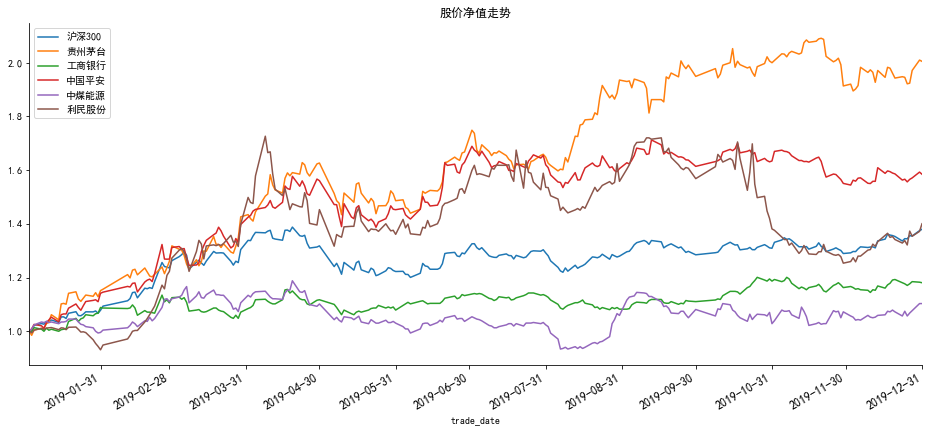

In [73]:
#将上述股票在回测期间内的净值可视化
df_new.plot(figsize=(16,7))
#图标题
plt.title('股价净值走势',fontsize=12)#,fontproperties = myfont)
#设置x轴坐标
my_ticks = pd.date_range('2019-01-01','2019-12-31',freq='M')
plt.xticks(my_ticks,fontsize=12)
#去掉上、右图的线
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#plt.legend(prop = myfont)
plt.show()

In [74]:
### 区间累计收益率(绝对收益率)
total_ret=df_new.iloc[-1]-1
TR=pd.DataFrame(total_ret.values,columns=['累计收益率'],index=total_ret.index)
TR

,累计收益率
沪深300,0.379536
贵州茅台,1.004326
工商银行,0.180628
中国平安,0.584324
中煤能源,0.103030
利民股份,0.400059


In [91]:
#numpy:np.maximum.accumulate计算序列累计最大值
name='沪深300'
#n_d=((np.maximum.accumulate(df[code])-df[code])/np.maximum.accumulate(df[code])).max()
#pandas使用cummax（）计算序列累计最大值
p_d=((df[name].cummax()-df[name])/df[name].cummax()).max()
print(df)
#打印结果
print(f'numpy方法计算结果：{round(n_d*100,2)}%')
print(f'pandas方法计算结果：{round(p_d*100,2)}%') 

                沪深300       贵州茅台    工商银行     中国平安    中煤能源     利民股份
trade_date                                                        
2019-01-02  2969.5353   590.2232  4.9804  53.9410  4.5511   9.8853
2019-01-03  2964.8421   581.3745  4.9804  54.4298  4.5904   9.8268
2019-01-04  3035.8741   593.1991  5.0474  55.3194  4.6593   9.9243
2019-01-07  3054.3030   596.6380  5.0187  55.0359  4.7084   9.9926
2019-01-08  3047.7035   595.9483  4.9804  54.5471  4.6986   9.9536
...               ...        ...     ...      ...     ...      ...
2019-12-25  3990.8671  1133.7000  5.8300  83.9300  4.8100  13.0600
2019-12-26  4025.9879  1135.1000  5.8600  84.4300  4.8600  13.5700
2019-12-27  4022.0278  1163.0000  5.9000  84.7200  4.9000  13.3800
2019-12-30  4081.6334  1185.8000  5.8900  85.8900  5.0200  13.5600
2019-12-31  4096.5821  1183.0000  5.8800  85.4600  5.0200  13.8400

[244 rows x 6 columns]
numpy方法计算结果：13.49%
pandas方法计算结果：13.49%


In [101]:
dd=((df.cummax()-df)/df.cummax()).max()
dd=pd.DataFrame(dd,columns=['累计最大值'])
dd

,累计最大值
沪深300,0.134915
贵州茅台,0.119124
工商银行,0.081529
中国平安,0.120334
中煤能源,0.213880
利民股份,0.273761


In [68]:
###年化收益率,假设一年以250交易日计算
annual_ret=pow(1+total_ret,250/len(df_new))-1
AR=pd.DataFrame(annual_ret.values,columns=['年化收益率'],index=annual_ret.index)
AR

,年化收益率
沪深300,0.390494
贵州茅台,1.038891
工商银行,0.185459
中国平安,0.602353
中煤能源,0.105693
利民股份,0.411692


In [75]:
#定义成函数，减少重复工作
def max_drawdown(df):
    md=((df.cummax()-df)/df.cummax()).max()
    return round(md,4)
md={}
for name,code in stocks.items():
    md[name]=max_drawdown(df[name])
#最大回撤率结果：
MD=pd.DataFrame(md,index=['最大回撤']).T
MD

,最大回撤
沪深300,0.1349
贵州茅台,0.1191
工商银行,0.0815
中国平安,0.1203
中煤能源,0.2139
利民股份,0.2738
